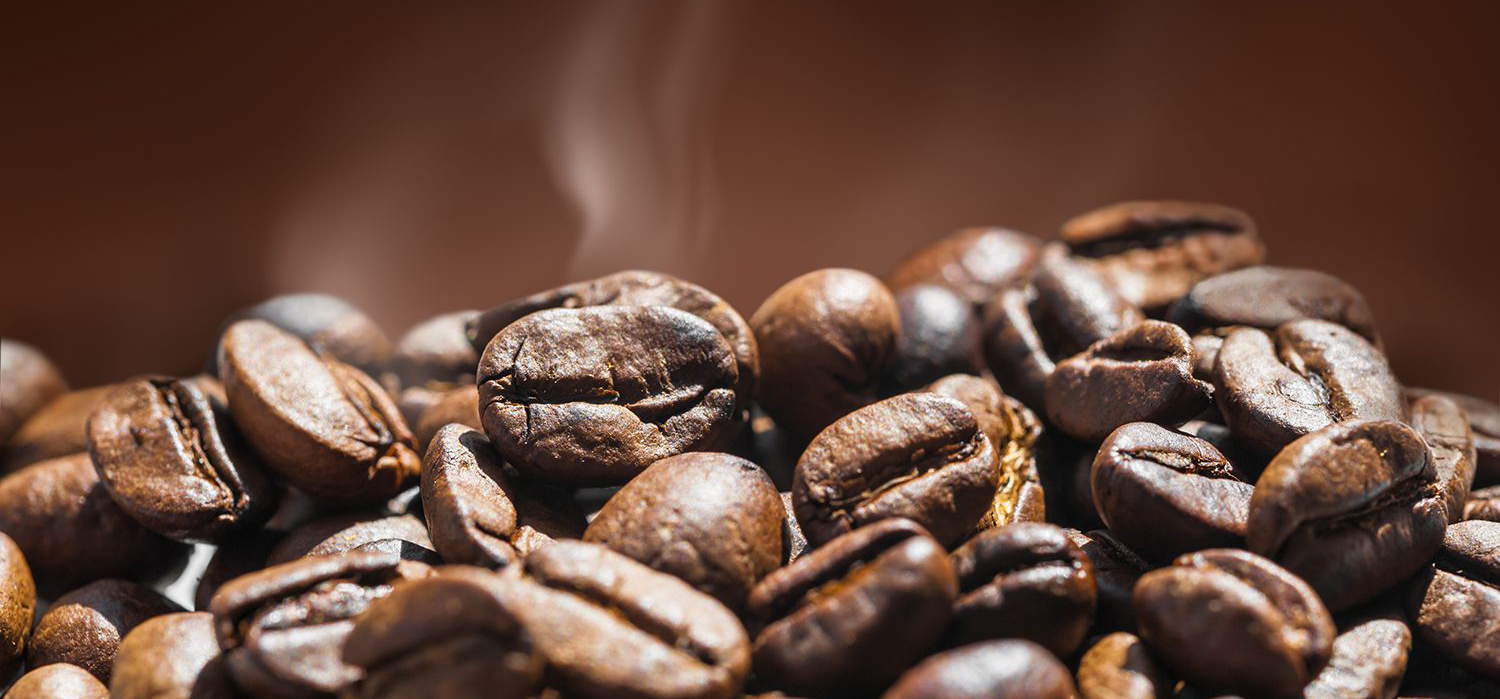

## <span style='color:brown'> Coffee Stock Futures Price & Quality Analysis </span>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import random
import scipy.stats as stats
from scipy.stats import normaltest 
from scipy.stats import shapiro
from scipy.stats import anderson
from scipy.stats import chi2_contingency
from statsmodels.graphics.gofplots import qqplot
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn import preprocessing

from scipy.stats import boxcox
from scipy.stats import skew

# <span style='color:lightblue'> Background Information </span>

- The actual price of futures contract very much depends upon the demand and suppply of the underlying stocks
- The price can be affected by different variations, e.g.weather/harvest, pandemic, economic

**Arabica coffee** futures traded around usd2.0 per pound, after touching a 7-year high of usd2.15 on October 12th, as rains in **Brazil** eased some concerns over future crops against a backdrop of persistent supply constraints and rising demand. Farmers in top producer Brazil said their coffee plants were flowering well as October saw above average rainfall, including in crops affected by drought and frosts earlier in the year, where prospects of it happening were low. Elsewhere, **Colombian** producers have failed to deliver up to 1 million bags of beans this year, aiming to re-sell them at higher prices. Meanwhile, **global coffee consumption is expected to exceed production this year for the first time since 2017**, according to the USDA.

Arabica coffee it is the world benchmark for coffee futures contracts that trade on the Inter Continental Exchange (ICE). Arabica accounts for 75 percent of the world’s production and is mostly cultivated in **Brazil (40% of the world’s total supply) and Colombia**. **Robusta** account for the remaining 25% and is mostly produced in Vietnam (15% of global supply) and Indonesia. Other major exporters include: Peru, India, Uganda, Ethiopia, Mexico and Cote Ivoire. **Robusta is the coffee bean that is popular in Europe and espresso coffees while Arabica beans are popular in the United States.**

# <span style='color:lightblue'> Business Case </span>

# Our Story

We are a group of friends who are interested in venturing into the wholesale business of selling premium coffee, because of the growing global demand for coffee consumption. 

# Business Research Questions

1. What is the ideal price to purchase coffee? <br>
2. Is the coffee grade score distribution similar among countries? <br>
3. Is the coffee price distribution similar among the grades? <br>

# <span style='color:lightblue'> Project Approach </span>

**Data source:**

*1. parametric test*

- **coffee_price:** obtained from Macrotrends.net, with 12,075 datapoints, stock futures: Coffee(KT:NMX)

In **Dataset1**, we have coffee future prices. With this dataset, we would be able to identify the ideal price to purchase coffee. To so, we have to perform data transformation to ensure that the data is approximately normal prior to conducting Z-test to identify its mean value.

*2. parametric test*

- **coffee_quality:** obtained from Kaggle, the dataset was gathered from Coffee Quality Institute (CQI) in January, 2018, with 1339 datapoints

In **Dataset2**, we have coffee quality. Using this data set, we would be able to test if the coffee grade score distribution is similar among the countries with at least 40 data points. To do so, we will first proceed with data transformation to ensure that the data is approximately normal prior to performing ANOVA. If some form of difference is detected during the test, we will follow through with Tukey HSD to identify the countries with different coffee grade score distributions. 

*3. non-parametric test*

- **coffee price vs coffee quality**

After merging **Dataset1** and **Dataset2**, we would want to see if the coffee price distribution is similar among the various grades. If there is some form of normality, we will test for similarity using ANOVA. Otherwise, we will test using Kruskal-Wallis H-test. 

## <span style='color:orange'> 1st Dataset : coffee futures prices </span>

- daily price (usd per pound) of coffee commodity from 20/8/1973 to 15/10/2021

In [2]:
df_price = pd.read_csv('./coffee_price.csv')
df_price.head(3)
df_price.describe()

,value
count,12075.000000
mean,1.261351
std,0.474009
min,0.425000
25%,0.945250
50%,1.234500
75%,1.464000
max,3.356300


In [3]:
# rename column
df_price = df_price.rename(columns={'date':'Date','value':'Price'})

# convert date format
df_price['Date'] = pd.to_datetime(df_price['Date'])

# check for missing values & 0
print(df_price.shape)
print('\n------------------------\n')
print('Check for missing values and 0 :')
print(df_price.isnull().sum())
print('\n------------------------\n')
print(df_price.all())

price = df_price['Price']

price.describe()
print('\n------------------------\n')
print(df_price.head(10))

(12075, 2)

------------------------

Check for missing values and 0 :
Date     0
Price    0
dtype: int64

------------------------

Date     True
Price    True
dtype: bool

------------------------

        Date   Price
0 1973-08-20  0.6735
1 1973-08-21  0.6710
2 1973-08-22  0.6580
3 1973-08-23  0.6675
4 1973-08-24  0.6660
5 1973-08-27  0.6590
6 1973-08-28  0.6400
7 1973-08-29  0.6345
8 1973-08-30  0.6387
9 1973-08-31  0.6402


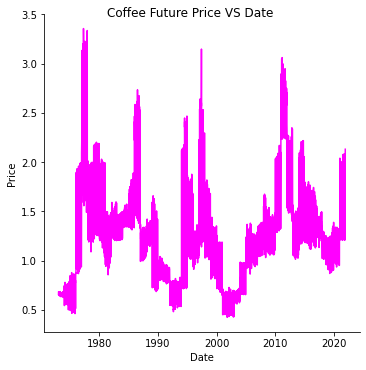

In [4]:
a = sns.relplot(x='Date',y='Price',data=df_price,kind='line',color='magenta')
a.fig.suptitle('Coffee Future Price VS Date')
plt.show()

# <span style='color:lightblue'> Normality Test </span>
<br>
$H_0$: Distribution is Normal
<br>
$H_1$: Distribution is not Normal

In [5]:
# create a function for normality test
def normality_check(data):
    
    # normal test
    stat, p = normaltest(data)       
    
    print('stat=%.2f, p=%.4f' % (stat, p))
    
    alpha = 0.05
    
    if p > alpha:
        print('Approximately Normally Distributed')
    else:
        print('Not Approximately Normally Distributed')
    
    # histogram 
    plt.style.use('fivethirtyeight')
    plt.rcParams["figure.figsize"] = [7,4]
    sns.set_style("darkgrid")
    sns.set_context("notebook", font_scale=1.5, rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 
    
     # to remove the warning message on future version
    import warnings 
    warnings.simplefilter(action="ignore", category=FutureWarning)
    
    # sns.displot(data,kind='kde') --> new python version
    # sns.histplot(data, kde = True) --> histogram
    sns.distplot(data,fit=stats.norm,kde=True)
    plt.title('Histogram distribution of Coffee Prices')
    plt.xlabel('Price of Coffee')
    plt.show()
    
    # boxplot
    plt.figure(figsize=(12,2))
    sns.boxplot(x = data.values, orient = 'h')
    
    # qq plot
    fig = plt.figure()
    ax1 = fig.add_subplot(211)
    prob = stats.probplot(data.values, dist=stats.norm, plot=ax1)
    ax1.set_xlabel('')
    ax1.set_title('Probplot against normal distribution')
    

In [6]:
# 3 additional tests for normal distribution
def more_norm_test(data):
    
    # Shapiro test (set sample size to 3000)
    if data.shape[0] > 5000:
        stat, p = shapiro(random.sample(list(data), k=3000))
    else:
        stat, p = shapiro(data)
    print('Shapiro test result: \n')
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject the null hypothesis)')
    else:
        print('Sample does not look Gaussian (reject the null hypothesis)')
        
    print('--------------------------------------------------')
    
    # Anderson-Darling test
    result = anderson(data)
    print('Anderson-Darling test result: \n')
    print('Statistic: %.3f' % result.statistic)
    p = 0.05
    for i in range(len(result.critical_values)):
        sl, cv = result.significance_level[i], result.critical_values[i]
        if result.statistic < result.critical_values[i]:
            print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
        else:
            print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))
            
    print('--------------------------------------------------')
    
    # Skewness & Kurtosis Statistics
    print('Skewness is {0} and Kurtosis is {1}'.format(stats.skew(data), stats.kurtosis(data, fisher=False)))

### 1. Test if the <span style='color:red'> daily price </span> is normally distributed

#### Result: <span style='color:blue'> Reject $H_0$ </span>

stat=1410.66, p=0.0000
Not Approximately Normally Distributed


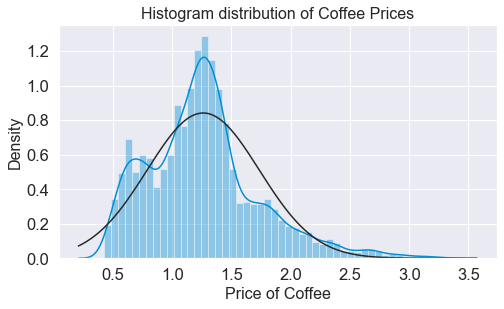

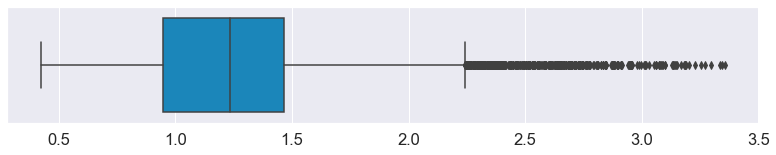

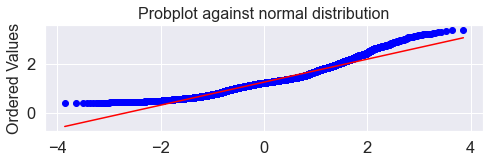

In [7]:
normality_check(price)

In [8]:
print(df_price.head(3))
print(df_price.tail(3))

        Date   Price
0 1973-08-20  0.6735
1 1973-08-21  0.6710
2 1973-08-22  0.6580
            Date   Price
12072 2021-11-10  2.0425
12073 2021-12-10  2.1315
12074 2021-10-13  2.0865


<b>Looking at the price distribution over the years above, there are 2 main considerations when picking the sample for testing:</b>
1) The recency of data - the latest data (1-2 years) should be included within the sample

2) The cyclical nature of data - given the cyclical patterns, we would want to take that into account for a better representation of the sample mean and for longer turn modelling purposes.

Hence, we have decided to take a time period of 20 years for comparison.


stat=649.61, p=0.0000
Not Approximately Normally Distributed


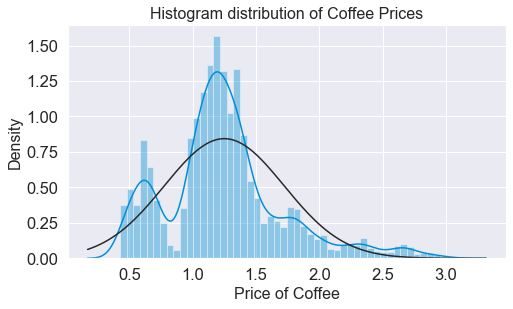

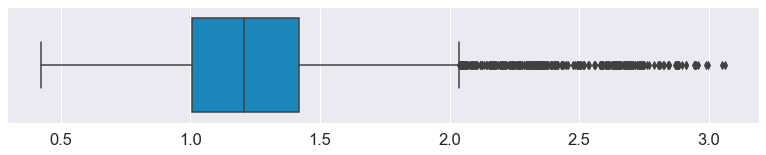

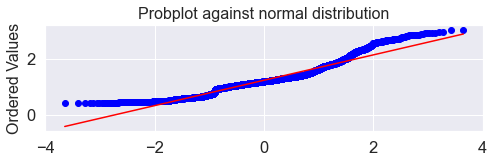

In [9]:
filtered_df = df_price.loc[df_price['Date'] >= '2001-01-02']
print("")
normality_check(filtered_df['Price'])

### 2. Test if the <span style='color:red'> transformed daily price </span> is normally distributed

#### Result: <span style='color:blue'> Do not reject $H_0$ </span>
#### Transformation used: <span style='color:blue'> Box Cox Transformation </span>

Lambda: 0.3177065358422062



D'AGOSTINO RESULTS
stat=5.51, p=0.0636
Approximately Normally Distributed


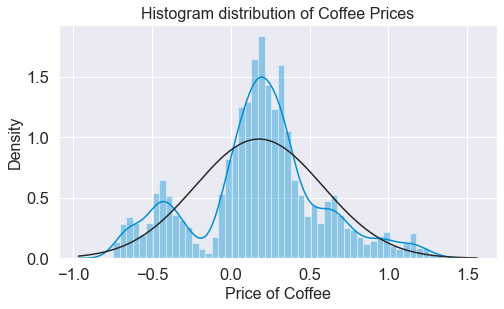

This is the box_cox output:  [-0.4242536  -0.42357144 -0.42493612 ...  0.80168884  0.85556786
  0.82852164]


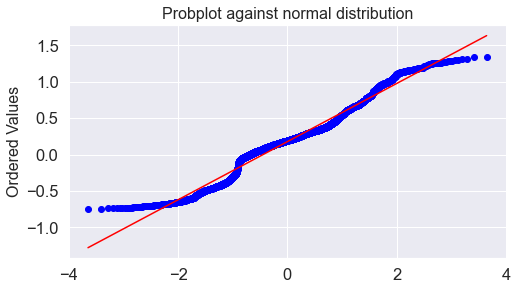

In [10]:
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import skew
from scipy.stats import yeojohnson
from scipy.stats import boxcox


#Boxcox
box_cox, best_Lambda_maxlog = boxcox(filtered_df['Price'])
print('Lambda:',best_Lambda_maxlog)
print('\n')


# normal test
print("\nD'AGOSTINO RESULTS")
stat, p = normaltest(box_cox) 
print('stat=%.2f, p=%.4f' % (stat, p))
    
alpha = 0.05
    
if p > alpha:
    print('Approximately Normally Distributed')
else:
    print('Not Approximately Normally Distributed')
    
# histogram 
plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = [7,4] 
sns.set_style("darkgrid")
sns.set_context("notebook", font_scale=1.5, rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 
sns.distplot(box_cox,fit=stats.norm,kde=True)
plt.title('Histogram distribution of Coffee Prices')
plt.xlabel('Price of Coffee')
plt.show()

fig = plt.figure()
ax1 = fig.add_subplot(111)
prob = stats.probplot(box_cox, dist=stats.norm, plot=ax1)
ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution')

print("This is the box_cox output: ", box_cox)

In [11]:
filtered_df['Transformed'] = box_cox
filtered_df = filtered_df.reset_index(drop=True)
print(filtered_df.head(10))

        Date   Price  Transformed
0 2001-02-01  0.6340    -0.424254
1 2001-03-01  0.6345    -0.423571
2 2001-04-01  0.6335    -0.424936
3 2001-05-01  0.6435    -0.411355
4 2001-08-01  0.6385    -0.418127
5 2001-09-01  0.6380    -0.418807
6 2001-10-01  0.6335    -0.424936
7 2001-11-01  0.6360    -0.421527
8 2001-12-01  0.6500    -0.402604
9 2001-01-16  0.6740    -0.370801


<ipython-input-11-188ab9ddd644>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Transformed'] = box_cox


### Visual Comparison with <span style='color:red'> other non-linear </span> transformation


D'AGOSTINO RESULTS
stat=2.62, p=0.2692
Approximately Normally Distributed after Yeo Johnson Transformation


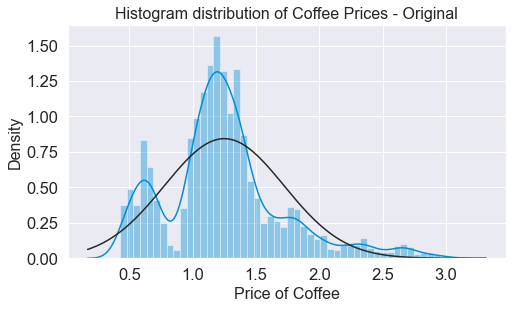

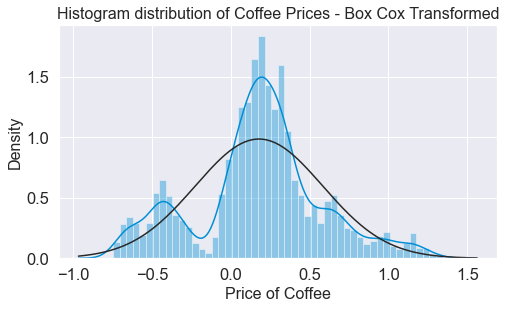

This is the yeo_John output:  [0.82554249 0.82599048 0.8250943  ... 1.6526394  1.6881783  1.67035902]


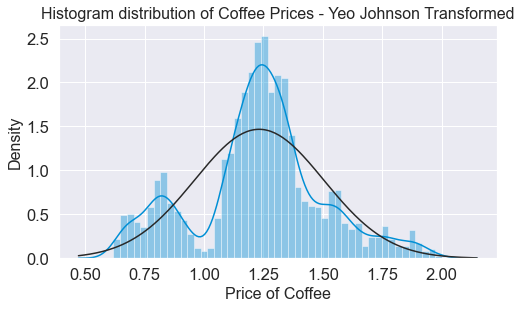

In [12]:
yeo_John, best_Lambda_Yeo_John = yeojohnson(filtered_df['Price']* 2)

# normal test
print("\nD'AGOSTINO RESULTS")
stat, p = normaltest(yeo_John) 
print('stat=%.2f, p=%.4f' % (stat, p))
    
alpha = 0.05
    
if p > alpha:
    print('Approximately Normally Distributed after Yeo Johnson Transformation')
else:
    print('Not Approximately Normally Distributed Yeo Johnson Transformation')

    
# ORIGINAL histogram 
plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = [7,4]
sns.set_style("darkgrid")
sns.set_context("notebook", font_scale=1.5, rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 
sns.distplot(filtered_df['Price'],fit=stats.norm,kde=True)
plt.title('Histogram distribution of Coffee Prices - Original')
plt.xlabel('Price of Coffee')
plt.show()

# YEO JOHNSON histogram 
plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = [7,4]
sns.set_style("darkgrid")
sns.set_context("notebook", font_scale=1.5, rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 
sns.distplot(box_cox,fit=stats.norm,kde=True)
plt.title('Histogram distribution of Coffee Prices - Box Cox Transformed')
plt.xlabel('Price of Coffee')
plt.show()
print("This is the yeo_John output: ", yeo_John)

# BOXCOX histogram 
plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = [7,4]
sns.set_style("darkgrid")
sns.set_context("notebook", font_scale=1.5, rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 
sns.distplot(yeo_John,fit=stats.norm,kde=True)
plt.title('Histogram distribution of Coffee Prices - Yeo Johnson Transformed')
plt.xlabel('Price of Coffee')
plt.show()


We see that there aren't much changes before/after the non-linear transformation, but the transformed dataset passed the D'Agostino Goodness of fit test. Hence, we will proceed with the Parametric test for means.

# <span style='color:lightblue'> Parametric Test </span>

### 1. Test if the <span style='color:red'> sample mean </span> is equal to population mean

<br>
$H_0$: Sample mean is equal to population mean
<br>
$H_1$: Sample mean is not equal to population mean

#### Test Used: <span style='color:green'> Two-tailed Z-Test </span>
#### Result: <span style='color:green'> Reject $H_0$ </span>

In [13]:
import scipy
inverse_box_cox = scipy.special.inv_boxcox(box_cox, best_Lambda_maxlog)

from statsmodels.stats.weightstats import ztest
average = df_price['Price'].mean()
print("The population mean is ", average)
print("The sample mean is ", filtered_df['Price'].mean())
print("The Box Cox Sample Mean is ", filtered_df['Transformed'].mean())

box_cox2 = boxcox(df_price['Price'], best_Lambda_maxlog)
transformed_pop_mean = box_cox2.mean()
print("The Box Cox Population Mean is ", transformed_pop_mean)

#USING BOXCOX SAMPLE VS BOXCOX POP MEAN
(test_statistic, p_value) = ztest(filtered_df['Transformed'], value=transformed_pop_mean, alternative='two-sided', ddof=1.0)
print("\n\nZ-Test Results for Boxcox Sample Mean vs Boxcox Population Mean (Transformed with same Lambda)")
print("The test statistic is: ", test_statistic)
print("The p-value is: ", p_value)


#USING UNTRANSFORMED VS POP MEAN
(test_statistic, p_value) = ztest(filtered_df['Price'], value=average, alternative='two-sided', ddof=1.0)
print("\n\nZ-Test Results for Untransformed Sample Mean vs Population Mean (Violates Normality Rule)")
print("The test statistic is: ", test_statistic)
print("The p-value is: ", p_value)


print("\nSince p-value < 0.05, we reject the null hypothesis that the mean is the same as the Population mean.")


The population mean is  1.2613510973084834
The sample mean is  1.2483555258126193
The Box Cox Sample Mean is  0.17778835446579566
The Box Cox Population Mean is  0.18994212120386947


Z-Test Results for Boxcox Sample Mean vs Boxcox Population Mean (Transformed with same Lambda)
The test statistic is:  -2.171826165111622
The p-value is:  0.02986877732346622


Z-Test Results for Untransformed Sample Mean vs Population Mean (Violates Normality Rule)
The test statistic is:  -1.9871336934820425
The p-value is:  0.046907583314335706

Since p-value < 0.05, we reject the null hypothesis that the mean is the same as the Population mean.


### 2. Test if the <span style='color:red'> sample mean </span> is greater than population mean
<br>
$H_0$: Sample mean is less or equals to population mean
<br>
$H_1$: Sample mean is greater than population mean

#### Test Used: <span style='color:green'> One-tailed Z-Test </span>
#### Result: <span style='color:green'> Do not reject $H_0$ </span>

In [14]:
print("The population mean is ", average)
print("The sample mean is ", filtered_df['Price'].mean())
print("The Box Cox Sample Mean is ", filtered_df['Transformed'].mean())
print("The Box Cox Population Mean is ", transformed_pop_mean)


#USING BOXCOX SAMPLE VS BOXCOX POP MEAN
(test_statistic, p_value) = ztest(filtered_df['Transformed'], value=transformed_pop_mean, alternative='larger', ddof=1.0)
print("\n\nZ-Test Results for Boxcox Sample Mean vs Boxcox Population Mean (Transformed with same Lambda)")
print("The test statistic is: ", test_statistic)
print("The p-value is: ", p_value)


#USING UNTRANSFORMED VS POP MEAN
(test_statistic, p_value) = ztest(filtered_df['Price'], value=average, alternative='larger', ddof=1.0)
print("\n\nZ-Test Results for Untransformed Sample Mean vs Population Mean (Violates Normality Rule)")
print("The test statistic is: ", test_statistic)
print("The p-value is: ", p_value)

print("By performing a one-tailed Z-test, we are unable to reject the null hypothesis.")
print("Hence, we conclude that the sample mean is less than the population mean.")

The population mean is  1.2613510973084834
The sample mean is  1.2483555258126193
The Box Cox Sample Mean is  0.17778835446579566
The Box Cox Population Mean is  0.18994212120386947


Z-Test Results for Boxcox Sample Mean vs Boxcox Population Mean (Transformed with same Lambda)
The test statistic is:  -2.171826165111622
The p-value is:  0.9850656113382669


Z-Test Results for Untransformed Sample Mean vs Population Mean (Violates Normality Rule)
The test statistic is:  -1.9871336934820425
The p-value is:  0.9765462083428321
By performing a one-tailed Z-test, we are unable to reject the null hypothesis.
Hence, we conclude that the sample mean is less than the population mean.


In [15]:
#Translating Boxcoz values back to Original Prices
Sample_mean_df = (filtered_df.loc[(filtered_df['Transformed'] >= 0.177) & (filtered_df['Transformed'] <= 0.178)])
Pop_mean_df = (filtered_df.loc[(filtered_df['Transformed'] >= 0.189) & (filtered_df['Transformed'] <= 0.190)])

print("The inverse boxcox Sample Mean is ", Sample_mean_df['Price'].mean())
print("The inverse boxcox Population Mean is ", Pop_mean_df['Price'].mean())

The inverse boxcox Sample Mean is  1.1887
The inverse boxcox Population Mean is  1.20215


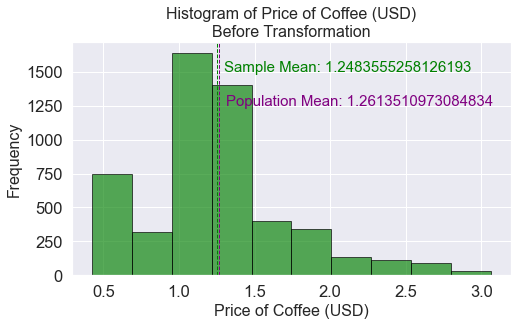

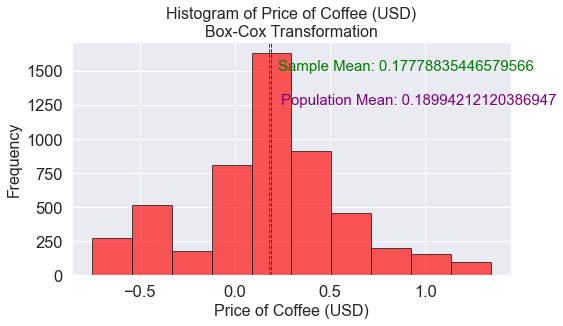

In [16]:
# before transformation 
result = plt.hist(filtered_df['Price'], color='g', edgecolor='k', alpha=0.65) 


plt.axvline(filtered_df['Price'].mean(), color='g', linestyle='dashed', linewidth=1)
plt.axvline(average, color='purple', linestyle='dashed', linewidth=1)

plt.text(filtered_df['Price'].mean()+0.05, 1500, 'Sample Mean: {}'.format(filtered_df['Price'].mean()), fontsize=15, color ='g') 
plt.text(average+0.05, 1250, 'Population Mean: {}'.format(average), fontsize=15, color ='purple') 

plt.xlabel("Price of Coffee (USD)")
plt.ylabel("Frequency")
plt.title("Histogram of Price of Coffee (USD)\nBefore Transformation")
plt.show()


# after box-cox transformation  
result = plt.hist(filtered_df['Transformed'], color='r', edgecolor='k', alpha=0.65) 
plt.axvline(filtered_df['Transformed'].mean(), color='g', linestyle='dashed', linewidth=1)
plt.axvline(transformed_pop_mean, color='purple', linestyle='dashed', linewidth=1)

plt.text(filtered_df['Transformed'].mean()+0.05, 1500, 'Sample Mean: {}'.format(filtered_df['Transformed'].mean()), fontsize=15, color ='g') 
plt.text(transformed_pop_mean+0.05, 1250, 'Population Mean: {}'.format(transformed_pop_mean), fontsize=15, color ='purple') 

plt.xlabel("Price of Coffee (USD)") 
plt.ylabel("Frequency")
plt.title("Histogram of Price of Coffee (USD)\nBox-Cox Transformation")
plt.show()

The population mean is  1.2613510973084834 <br>
The sample mean is  1.2483555258126193 <br>
The Box Cox Sample Mean is  0.17778835446579566 <br>
The Box Cox Population Mean is  0.18994212120386947 <br>

## <span style='color:orange'> 1st Dataset Conclusion:  </span>

Even though we were unable to show that the mean of the recent 20years are the same as the population of 50 years, what we can tell are the following statements:

- Prices are cyclical but the mean decreases over time
- When the price is below the Population Mean (1.202), it may not necessarily be a good time to purchase as it may be above the Sample mean
- However, when the price falls below the Sample mean (1.188), it is a good sign for purchase of Coffee Futures as the both population and sample agree that the commodity is likely to be undervalued.

## <span style='color:orange'> 2nd Dataset : coffee quality </span>

#### Assumption:

- The quality of coffee bean is measured by the score 

#### Background infomation on coffee quality SCORES

- Score refers to the total cupping points

- The cupping form is where we score coffee on a standardized scale—with points usually ranging from 6-10 in ten different categories such as Fragrance/Aroma, Flavor, Body, Acidity, and Balance. These scores get summed together to get a final score, usually in the 80-90 range.


In [17]:
raw_df_coffee = pd.read_csv('./coffee_quality.csv')
print(raw_df_coffee.shape)
raw_df_coffee.columns

(1339, 44)


Index(['Unnamed: 0', 'Species', 'Owner', 'Country.of.Origin', 'Farm.Name',
       'Lot.Number', 'Mill', 'ICO.Number', 'Company', 'Altitude', 'Region',
       'Producer', 'Number.of.Bags', 'Bag.Weight', 'In.Country.Partner',
       'Harvest.Year', 'Grading.Date', 'Owner.1', 'Variety',
       'Processing.Method', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body',
       'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points',
       'Total.Cup.Points', 'Moisture', 'Category.One.Defects', 'Quakers',
       'Color', 'Category.Two.Defects', 'Expiration', 'Certification.Body',
       'Certification.Address', 'Certification.Contact', 'unit_of_measurement',
       'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters'],
      dtype='object')

# <span style='color:blue'> Wrangling </span>

In [18]:
# drop irrelevant columns for this project
raw_df_coffee.drop(columns = ['Unnamed: 0', 'Number.of.Bags','Category.One.Defects',
                              'Category.Two.Defects','Cupper.Points','altitude_low_meters',
                              'altitude_high_meters','altitude_mean_meters'], inplace = True)
# extract data
df_coffee = raw_df_coffee[['Species', 'Country.of.Origin', 'Grading.Date', 'Total.Cup.Points']]

# rename columns
df_coffee = df_coffee.rename(columns={'Country.of.Origin': 'Origin', 
                                      'Grading.Date':'Date', 'Total.Cup.Points':'Score'})
# convert date format
df_coffee['Date'] = pd.to_datetime(df_coffee['Date'])
df_coffee = df_coffee.sort_values(by=['Date'])

# only look at Arabica coffee
df_coffee = df_coffee[df_coffee['Species']=='Arabica']

df_coffee.head()

,Species,Origin,Date,Score
1164,Arabica,Thailand,2010-04-09,79.67
1261,Arabica,Mexico,2010-04-09,76.75
1191,Arabica,Mexico,2010-04-09,79.17
558,Arabica,Thailand,2010-04-13,82.92
532,Arabica,Thailand,2010-04-13,83.00


In [19]:
# check for 0
print(df_coffee.all())
print('------------------------------------')
zero = df_coffee[df_coffee.Score == 0]
print(zero)
print('------------------------------------')
i = zero.index
# 1 record only -> drop
df_coffee = df_coffee.drop(i)
print(df_coffee.all())

Species     True
Origin      True
Date        True
Score      False
dtype: bool
------------------------------------
      Species    Origin       Date  Score
1310  Arabica  Honduras 2017-04-28    0.0
------------------------------------
Species    True
Origin     True
Date       True
Score      True
dtype: bool


In [20]:
# check for missing values 
print(df_coffee.isnull().sum())
print('------------------------------------')
print(df_coffee[df_coffee.Origin.isnull()])
print('------------------------------------')
# 1 record only -> drop
df_coffee = df_coffee.dropna()
print(df_coffee.isnull().sum())

Species    0
Origin     1
Date       0
Score      0
dtype: int64
------------------------------------
      Species Origin       Date  Score
1197  Arabica    NaN 2011-03-01  79.08
------------------------------------
Species    0
Origin     0
Date       0
Score      0
dtype: int64


In [21]:
# Coffee Total Score Quality Classification from SCAA (Specialty Coffee Association of America)

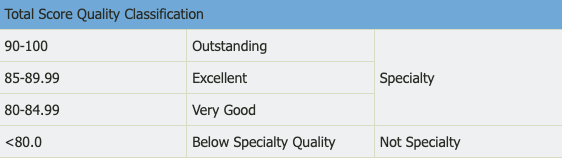

image source : http://www.scaa.org/?page=resources&d=cupping-protocols&mod=article_inline

In [22]:
df_coffee = df_coffee.assign(Grade=pd.cut(df_coffee['Score'], 
                               bins=[0, 80, 85, 90, 100], 
                               labels=['D','C','B','A']))

In [23]:
df_coffee.head(3)

,Species,Origin,Date,Score,Grade
1164,Arabica,Thailand,2010-04-09,79.67,D
1261,Arabica,Mexico,2010-04-09,76.75,D
1191,Arabica,Mexico,2010-04-09,79.17,D


# <span style='color:blue'> EDA </span>

In [24]:
d = df_coffee[['Origin','Grade']]
d = d.groupby('Grade').agg('count')
d

,Origin
Grade,
D,187
C,1026
B,95
A,1


Text(0.5, 1.0, 'Coffee Quality Grade')

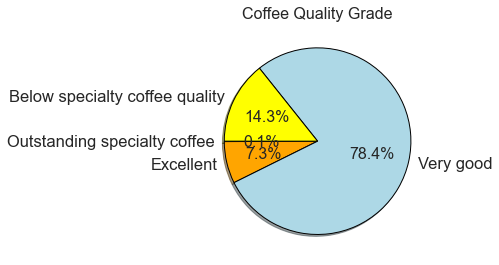

In [25]:
# Check the distribution of grades using pie chart 
val = d.Origin
slices = [val[3],val[2],val[1],val[0]]
labels = ['Outstanding specialty coffee', 'Excellent', 'Very good', 'Below specialty coffee quality']

colors = ['pink', 'orange', 'lightblue', 'yellow']

plt.pie(slices, labels = labels, colors = colors, 
        shadow = True, startangle = 180,
        # show % on each slice
        autopct = '%1.1f%%',
        wedgeprops = {'edgecolor':'black'})

plt.title("Coffee Quality Grade")

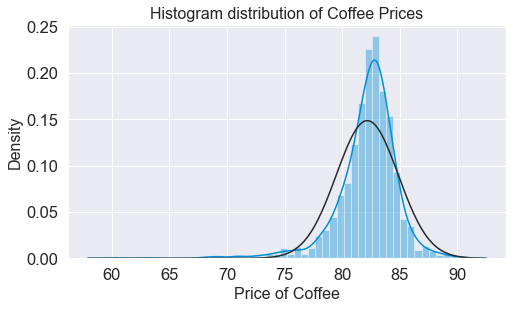

In [26]:
sns.distplot(df_coffee['Score'],fit=stats.norm,kde=True)
plt.title('Histogram distribution of Coffee Prices')
plt.xlabel('Price of Coffee')
plt.show()

In [27]:
#Identify Origins with Significant datapoints (Count)

origin_agg = df_coffee.groupby('Origin').agg(['count', 'mean'])
origin_agg.columns = origin_agg.columns.droplevel(0)
print('There are total {} origin of countries in this data.'.format(origin_agg.shape[0]))

# trying to get two samples with same size
origin_agg  = origin_agg.iloc[: , -2:]
origin_agg = origin_agg.sort_values(by = 'count', ascending=False)
# origin_final = origin_agg.assign(Origin = origin_agg.index)
# origin_final

origin_agg

There are total 36 origin of countries in this data.


,count,mean
Origin,,
Mexico,236,80.890085
Colombia,183,83.106557
Guatemala,181,81.846575
Brazil,132,82.405909
Taiwan,75,82.001333
United States (Hawaii),73,81.820411
Honduras,52,80.883654
Costa Rica,51,82.789020
Ethiopia,44,85.484091


# Extract Countries with Significant amount of datapoints


In [28]:
# drop countries containing less <= 40

countriestoremove = list(origin_agg[ origin_agg['count'] <= 40 ].index)
print(countriestoremove)

df_coffee2 = df_coffee

counter = []

for COUNTRY in countriestoremove:
    df_coffee2 = (df_coffee2[df_coffee2['Origin'] != COUNTRY])
    counter.append(df_coffee2) 
    
newdf = pd.DataFrame(counter[-1])
newdf
# print(df_coffee3)

['Tanzania, United Republic Of', 'Thailand', 'Nicaragua', 'Uganda', 'Kenya', 'El Salvador', 'Indonesia', 'China', 'Malawi', 'Peru', 'United States', 'Myanmar', 'Vietnam', 'Haiti', 'Philippines', 'Panama', 'United States (Puerto Rico)', 'Laos', 'Burundi', 'Mauritius', 'Rwanda', 'Papua New Guinea', 'Japan', 'India', 'Ecuador', 'Cote d?Ivoire', 'Zambia']


,Species,Origin,Date,Score,Grade
1261,Arabica,Mexico,2010-04-09,76.75,D
1191,Arabica,Mexico,2010-04-09,79.17,D
190,Arabica,Guatemala,2010-04-30,84.33,C
95,Arabica,United States (Hawaii),2010-05-17,85.08,B
858,Arabica,United States (Hawaii),2010-05-24,81.83,C
...,...,...,...,...,...
1013,Arabica,Taiwan,2017-12-08,80.92,C
578,Arabica,Guatemala,2018-01-09,82.75,C
240,Arabica,Costa Rica,2018-01-11,84.00,C
998,Arabica,Brazil,2018-01-16,81.00,C


In [29]:
newdf_copy = newdf.copy(True) # use to calculate population mean score
newdf_copy.mean()
newdf_copy.shape

(1027, 5)

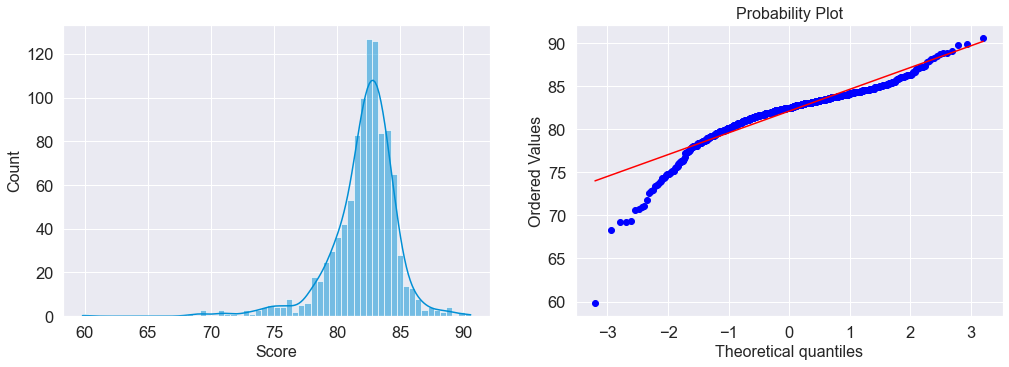

In [30]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
sns.histplot(newdf.Score, kde = True, ax=ax1)
prob = stats.probplot(df_coffee2.Score, dist=stats.norm, plot=ax2)
# looks like flipped log normal distribution (left skewed)

# <span style='color:lightblue'> Normality Test </span>
<br>
$H_0$: Distribution is Normal
<br>
$H_1$: Distribution is not Normal

### 1. Test if the <span style='color:red'> score </span> is normally distributed

#### Result: <span style='color:red'> $H_1$: Distribution is not Normal </span>

stat=436.18, p=0.0000
Not Approximately Normally Distributed


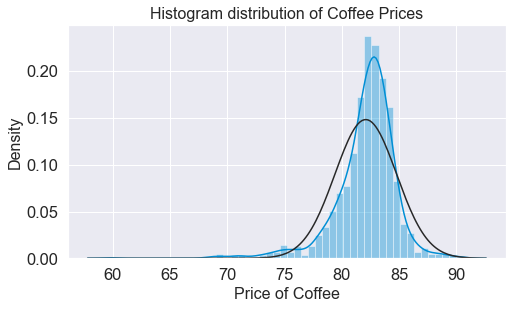

Shapiro test result: 

Statistics=0.879, p=0.000
Sample does not look Gaussian (reject the null hypothesis)
--------------------------------------------------
Anderson-Darling test result: 

Statistic: 27.505
15.000: 0.574, data does not look normal (reject H0)
10.000: 0.653, data does not look normal (reject H0)
5.000: 0.784, data does not look normal (reject H0)
2.500: 0.914, data does not look normal (reject H0)
1.000: 1.088, data does not look normal (reject H0)
--------------------------------------------------
Skewness is -1.7630642616129626 and Kurtosis is 11.140981204081822


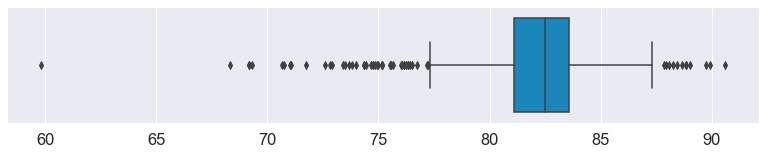

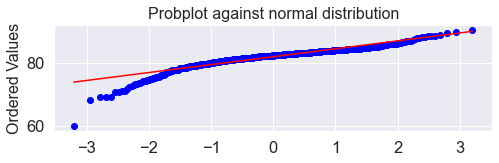

In [31]:
normality_check(newdf.Score)
more_norm_test(newdf.Score)
# approx negatively skewed (left skewed)

### Removal of Outliers

The 1st Quartile: 81.08
The 3rd Quartile: 83.58
The IQR (50% between 1st to 3rd QR): 2.5
The Lower Whisker is : 78.58 and Upper Whisker is 88.08
stat=0.09, p=0.9548
Approximately Normally Distributed


<ipython-input-32-4c4c684e1699>:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outlier3 = outlier2[newdf.Score > Lower_Whisker]


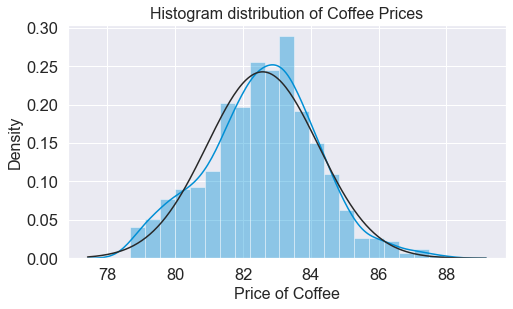

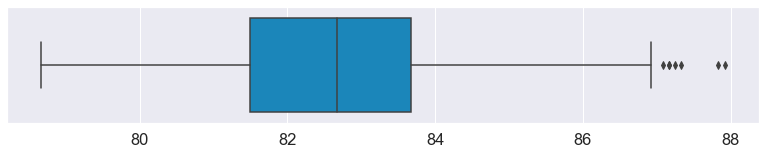

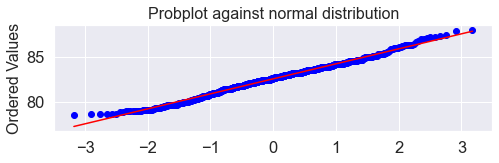

In [32]:
Q1 = newdf.Score.quantile(0.25)
Q3 = newdf.Score.quantile(0.75)
IQR = Q3-Q1
print('The 1st Quartile:', Q1)
print('The 3rd Quartile:', Q3)
print('The IQR (50% between 1st to 3rd QR):', IQR)

Lower_Whisker = Q1-1.0*IQR
Upper_Whisker = Q3+1.8*IQR
print('The Lower Whisker is : {} and Upper Whisker is {}'.format(Lower_Whisker, Upper_Whisker))

outlier2 = newdf[newdf.Score < Upper_Whisker]
outlier3 = outlier2[newdf.Score > Lower_Whisker]
normality_check(outlier3.Score)

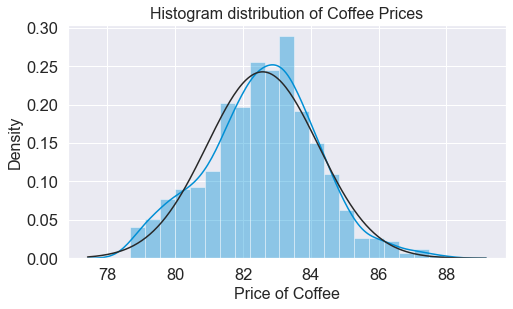

In [33]:
sns.distplot(outlier3.Score,fit=stats.norm,kde=True)
plt.title('Histogram distribution of Coffee Prices')
plt.xlabel('Price of Coffee')
plt.show()

#### Result: 

<span style='color:green'> $H_0$: Distribution is Normal </span>

Population data is now approximately normally distributed as p=0.95 > 0.05 (reject null hypothesis that data is not normal)

# EDA for Individual Filtered Countries

In [34]:
outlier3

,Species,Origin,Date,Score,Grade
1191,Arabica,Mexico,2010-04-09,79.17,D
190,Arabica,Guatemala,2010-04-30,84.33,C
95,Arabica,United States (Hawaii),2010-05-17,85.08,B
858,Arabica,United States (Hawaii),2010-05-24,81.83,C
949,Arabica,United States (Hawaii),2010-05-24,81.42,C
...,...,...,...,...,...
1013,Arabica,Taiwan,2017-12-08,80.92,C
578,Arabica,Guatemala,2018-01-09,82.75,C
240,Arabica,Costa Rica,2018-01-11,84.00,C
998,Arabica,Brazil,2018-01-16,81.00,C


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Mexico'),
  Text(1, 0, 'Colombia'),
  Text(2, 0, 'Guatemala'),
  Text(3, 0, 'Brazil'),
  Text(4, 0, 'Taiwan'),
  Text(5, 0, 'United States (Hawaii)'),
  Text(6, 0, 'Costa Rica'),
  Text(7, 0, 'Honduras'),
  Text(8, 0, 'Ethiopia')])

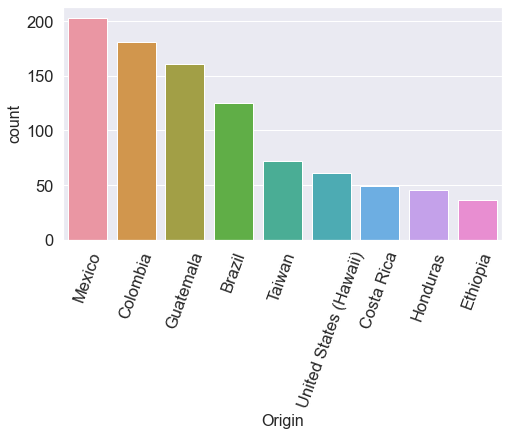

In [35]:
#identify unique values in the Country Column in the new df to be tested for individual normalisation test

totalcountries = len(outlier3['Origin'].unique())
uniqueValues = outlier3['Origin'].unique()
# print(f"These are the finalised countries: \n{uniqueValues}")
# print(f"A total of {totalcountries} countries for testing.")

sns.countplot(x="Origin", data=outlier3, order = outlier3['Origin'].value_counts().index)
plt.xticks(rotation=70)

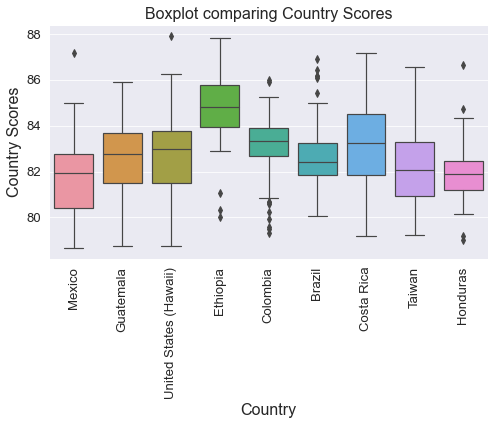

In [36]:
sns.set_context("paper", font_scale=1.5, rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 
plt.title('Boxplot comparing Country Scores')
sns.boxplot(x='Origin', y='Score', data=outlier3)
plt.xlabel('Country')
plt.ylabel('Country Scores')
plt.xticks(rotation=90)
plt.show()

# <span style='color:lightblue'> Parametric Test </span>

### 1. Test if there are <span style='color:red'> equal treatment/scores </span> between various countries 

#### <span style='color:blue'> ANOVA test </span>

<br>
$H_0$: All countries share the same scoring distribution (equal treament with similar scoring method) 
<br>
$H_1$: All countries do NOT share the same scoring distribution (NOT equal treament with disimilar scoring method) 

In [37]:
import statsmodels.api as sm                     #check if residual are normally distributed
import statsmodels.formula.api as smf           #use statsmodel formula
from statsmodels.formula.api import ols           #ols
from statsmodels.stats.anova import anova_lm      #fit the anova table
import statsmodels.stats.multicomp as multi  

In [38]:
outlier3

,Species,Origin,Date,Score,Grade
1191,Arabica,Mexico,2010-04-09,79.17,D
190,Arabica,Guatemala,2010-04-30,84.33,C
95,Arabica,United States (Hawaii),2010-05-17,85.08,B
858,Arabica,United States (Hawaii),2010-05-24,81.83,C
949,Arabica,United States (Hawaii),2010-05-24,81.42,C
...,...,...,...,...,...
1013,Arabica,Taiwan,2017-12-08,80.92,C
578,Arabica,Guatemala,2018-01-09,82.75,C
240,Arabica,Costa Rica,2018-01-11,84.00,C
998,Arabica,Brazil,2018-01-16,81.00,C


In [39]:
model = smf.ols('Score ~ C(Origin)', data=outlier3).fit()
aov_table = anova_lm(model, typ=2) 
print(aov_table)

                sum_sq     df          F        PR(>F)
C(Origin)   425.526249    8.0  23.468252  6.318701e-33
Residual   2096.512028  925.0        NaN           NaN


### Conclusion: 

#### Result: <span style='color:red'> $H_1$: All countries do NOT share the same scoring distribution (NOT equal treament with disimilar scoring method)  </span>

- As P-value is < 0.05, we reject the null hypothesis that the coffee grade scoring distribution is similar.

In [40]:
import statsmodels.stats.multicomp as multi
mcTreatment = multi.MultiComparison(outlier3['Score'], outlier3['Origin'])
results_Treatment  = mcTreatment.tukeyhsd()
print(results_Treatment.summary())

          Multiple Comparison of Means - Tukey HSD, FWER=0.05           
  group1           group2         meandiff p-adj   lower   upper  reject
------------------------------------------------------------------------
    Brazil               Colombia   0.5089 0.0881 -0.0354  1.0533  False
    Brazil             Costa Rica    0.431 0.7197 -0.3579    1.22  False
    Brazil               Ethiopia   2.0271  0.001  1.1417  2.9124   True
    Brazil              Guatemala  -0.1955    0.9 -0.7535  0.3625  False
    Brazil               Honduras  -0.7074 0.1402 -1.5146  0.0998  False
    Brazil                 Mexico  -0.9459  0.001 -1.4781 -0.4137   True
    Brazil                 Taiwan  -0.5181 0.3274 -1.2106  0.1745  False
    Brazil United States (Hawaii)   0.1626    0.9 -0.5685  0.8937  False
  Colombia             Costa Rica  -0.0779    0.9 -0.8317  0.6759  False
  Colombia               Ethiopia   1.5182  0.001   0.664  2.3724   True
  Colombia              Guatemala  -0.7044  0.001 -

All of Ethiopian pairings show reject as <span style='color:green'> True </span>. This means that they Ethiopian  coffee beans are significantly different in grading score from the rest of the countries. The confidence interval also does not include 0 value (mostly negative). 

The proof is in the pudding:

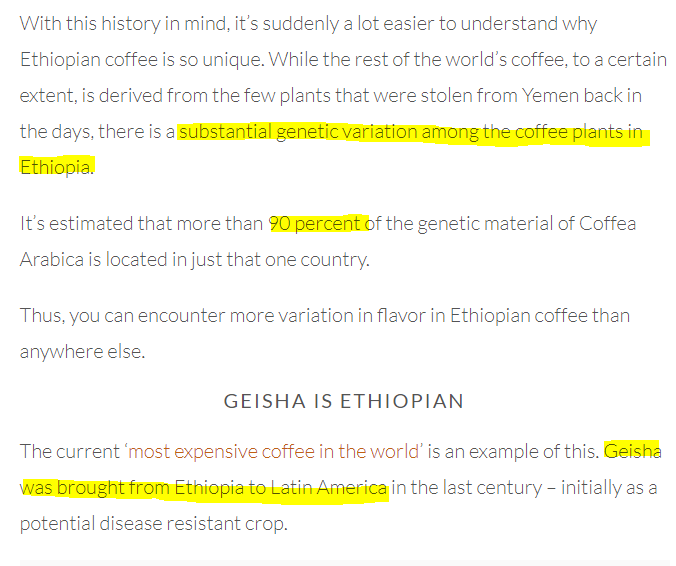

## <span style='color:orange'> Merge Datasets </span>
After both data transformation that were done previously
- coffee futures Price + coffee Quality
- merge by Date

In [41]:
# 1st dataset 
filtered_df.columns

Index(['Date', 'Price', 'Transformed'], dtype='object')

In [42]:
# 2nd dataset 
outlier3.columns

Index(['Species', 'Origin', 'Date', 'Score', 'Grade'], dtype='object')

In [43]:
merge_df = pd.merge(filtered_df, outlier3, on='Date')

In [44]:
print(merge_df.shape)
merge_df.head(3)

(786, 7)


,Date,Price,Transformed,Species,Origin,Score,Grade
0,2010-09-03,1.3275,0.296438,Arabica,Colombia,82.67,C
1,2010-04-30,1.3528,0.317157,Arabica,Guatemala,84.33,C
2,2010-05-17,1.3255,0.294789,Arabica,United States (Hawaii),85.08,B


In [45]:
merge_df_copy = merge_df.copy(True) # code needed for later part
merge_df_copy 

,Date,Price,Transformed,Species,Origin,Score,Grade
0,2010-09-03,1.3275,0.296438,Arabica,Colombia,82.67,C
1,2010-04-30,1.3528,0.317157,Arabica,Guatemala,84.33,C
2,2010-05-17,1.3255,0.294789,Arabica,United States (Hawaii),85.08,B
3,2010-05-24,1.3225,0.292311,Arabica,United States (Hawaii),81.83,C
4,2010-05-24,1.3225,0.292311,Arabica,United States (Hawaii),81.42,C
...,...,...,...,...,...,...,...
781,2017-05-12,1.2740,0.251721,Arabica,Mexico,80.92,C
782,2017-05-12,1.2740,0.251721,Arabica,Mexico,81.42,C
783,2018-01-16,1.2045,0.191674,Arabica,Brazil,81.00,C
784,2018-01-19,1.2125,0.198704,Arabica,Honduras,81.58,C


In [46]:
# check numbers of samples under "A" since very few from the original dataset
merge_df[merge_df.Grade=='A']

,Date,Price,Transformed,Species,Origin,Score,Grade


### There is no sample under grade A, so we will focus on grade B , C & D only 

In [47]:
# For duplicated prices, we aggregate with their mean score
merge_df = merge_df.groupby('Price').agg('mean').reset_index() # columns = ['Price', 'Transformed', 'Score']

# Add in the Grade
merge_df = merge_df.assign(Grade=pd.cut(merge_df['Score'], 
                               bins=[0, 80, 85, 90], 
                               labels=['D','C','B']))
print(merge_df.shape)
merge_df.head(3)

(339, 4)


,Price,Transformed,Score,Grade
0,1.0695,0.067914,83.67,C
1,1.0710,0.069346,83.75,C
2,1.1020,0.098641,81.75,C


In [48]:
# check the number of samples for each group(grade)
count = merge_df.groupby('Grade').agg('count')
count.iloc[:,2]

Grade
D     16
C    310
B     13
Name: Score, dtype: int64

In [49]:
# Remove column [Transformed]
merge_df = merge_df[['Price','Score', 'Grade']]

In [50]:
# Check the earliest date in both data
print(outlier3.head(1).Date)
print(filtered_df.head(1).Date)

1191   2010-04-09
Name: Date, dtype: datetime64[ns]
0   2001-02-01
Name: Date, dtype: datetime64[ns]


In [51]:
# join back whith the date
filtered_df1 = filtered_df[filtered_df.Date > '2010-04-09']
#filtered_df1 = filtered_df[(filtered_df.Date > '2010-04-09') & (filtered_df.Date <= '2018-01-19')] # add-in

filtered_df1 = filtered_df1.drop_duplicates(subset=['Price'])
merge_df = pd.merge(filtered_df1, merge_df, on='Price')

In [52]:
print(merge_df.shape)
merge_df.head(3)

(339, 5)


,Date,Price,Transformed,Score,Grade
0,2010-07-01,1.4190,0.370148,81.000,C
1,2010-10-02,1.3220,0.291898,83.875,C
2,2010-12-02,1.3275,0.296438,82.670,C


# <span style='color:lightblue'> Normality Test </span>
<br>
$H_0$: Distribution is Normal
<br>
$H_1$: Distribution is not Normal

### 1. Test if the <span style='color:red'> price </span> is normally distributed
 ( for both original and transformed price )

#### Result: <span style='color:red'> $H_1$: Distribution is not Normal </span>

stat=56.42, p=0.0000
Not Approximately Normally Distributed


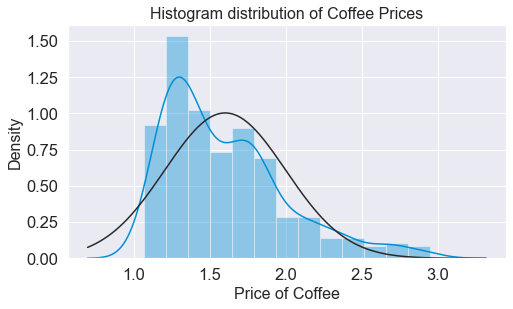

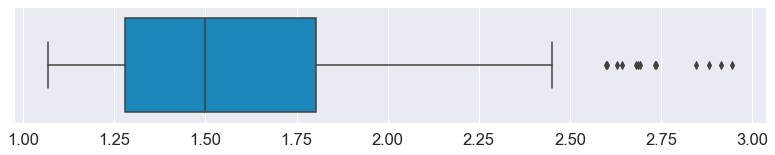

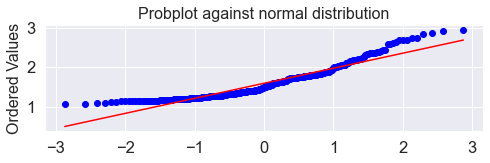

In [53]:
normality_check(merge_df.Price)

stat=28.22, p=0.0000
Not Approximately Normally Distributed


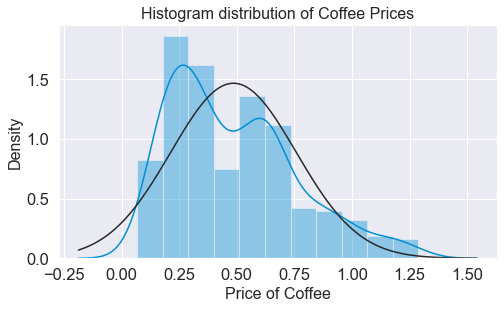

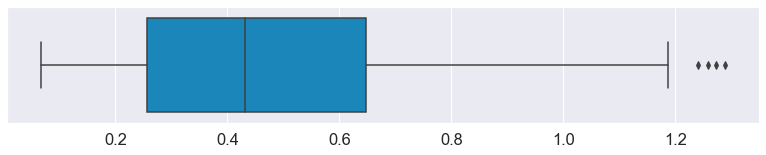

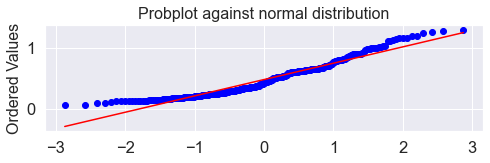

In [54]:
normality_check(merge_df.Transformed)

### 2. Test if the <span style='color:red'> price ( transform ) after data merging </span> is normally distributed

#### Result: <span style='color:blue'> Reject $H_0$ </span>
#### Transformation used: <span style='color:blue'> Box Cox Transformation </span>

In [55]:
# Boxcox
box_cox, best_Lambda_maxlog = boxcox(merge_df['Price'])
more_norm_test(box_cox)

Shapiro test result: 

Statistics=0.970, p=0.000
Sample does not look Gaussian (reject the null hypothesis)
--------------------------------------------------
Anderson-Darling test result: 

Statistic: 3.192
15.000: 0.569, data does not look normal (reject H0)
10.000: 0.648, data does not look normal (reject H0)
5.000: 0.778, data does not look normal (reject H0)
2.500: 0.907, data does not look normal (reject H0)
1.000: 1.079, data does not look normal (reject H0)
--------------------------------------------------
Skewness is 0.10741663505141753 and Kurtosis is 1.9929032396233946


#### Since the price after data merging is not normal, we decided to run a non-parametric test

## check distributions of price at different grades

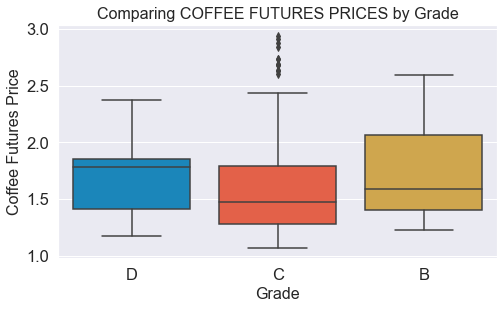

In [56]:
# using Boxplot
plt.title('Comparing COFFEE FUTURES PRICES by Grade')
sns.boxplot(x ='Grade', y ='Price', data = merge_df)
plt.ylabel('Coffee Futures Price')
plt.show()

In [57]:
price_grade = merge_df[['Price', 'Grade']]

# Preparing data in columns for the test
# We will use the same 3 Grades as 3 different groups of Price

merge_B = price_grade[(price_grade.Grade == 'B')]
merge_B = merge_B.reset_index(drop=True)
print(merge_B.head(3))
print('')

merge_C = price_grade[(price_grade.Grade == 'C')]
merge_C = merge_C.reset_index(drop=True)
print(merge_C.head(3))
print('')

merge_D = price_grade[(price_grade.Grade == 'D')]
merge_D = merge_D.reset_index(drop=True)
print(merge_D.head(3))

    Price Grade
0  1.5875     B
1  1.7812     B
2  2.4500     B

    Price Grade
0  1.4190     C
1  1.3220     C
2  1.3275     C

    Price Grade
0  2.3750     D
1  2.2525     D
2  1.7460     D


Text(0.5, 1.0, 'Grade D')

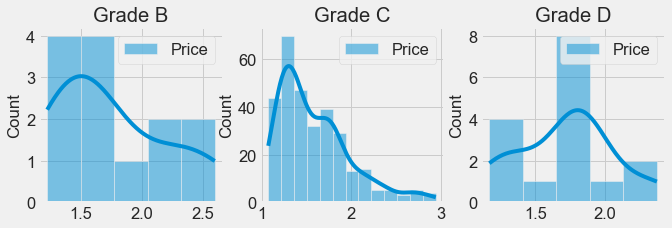

In [58]:
# using Histograms
plt.style.use('fivethirtyeight')

fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(10,3))

sns.histplot(merge_B, kde = True, ax=ax1)
sns.histplot(merge_C, kde = True, ax=ax2)
sns.histplot(merge_D, kde = True, ax=ax3)

ax1.set_title('Grade B')
ax2.set_title('Grade C')
ax3.set_title('Grade D')

In [59]:
# Median prices of the various grades
print("Median of Grade B: {}".format(merge_B['Price'].median()))
print("Median of Grade C: {}".format(merge_C['Price'].median()))
print("Median of Grade D: {}".format(merge_D['Price'].median())) 

Median of Grade B: 1.5875
Median of Grade C: 1.4718499999999999
Median of Grade D: 1.78375


# <span style='color:lightblue'> Non-Parametric Test </span>

### 1. Test if there is a  <span style='color:red'> significant difference  </span> between the distributions of different grades 

#### <span style='color:blue'> Kruskal Wallis </span>

$H_0$: the distribution for all prices within each grade are the same
<br>
$H_1$: the distribution for all prices within each grade are not the same

#### Result: <span style='color:blue'> Do not reject $H_0$ </span>

In [60]:
from scipy.stats import kruskal

stat, p = kruskal(merge_B['Price'], merge_C['Price'], merge_D['Price'])
print('Adjusted H Statistics=%.3f, p value=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Fail to reject the null hypothesis')
else:
    print('Reject the null hypothesis')

Adjusted H Statistics=4.905, p value=0.086
Fail to reject the null hypothesis


Test result: there **is no statistially significant difference** between the price distribution of different coffee quality grades

## <span style='color:lightblue'> Visualizing the Coffee Futures Price and Quality Scores </span>

Text(0, 0.5, 'USD/lb')

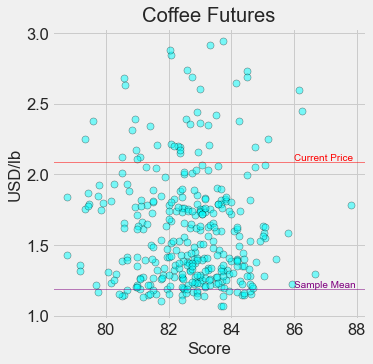

In [61]:
# Scatter plot 
data = merge_df

plt.subplots(figsize=(5,5)) 
plt.scatter(data.Score, data.Price, s = 50, edgecolor = 'black', alpha = 0.5, color ='cyan')

#cbar = plt.colorbar()
#cbar.set_label('Score')

plt.axhline(y=df_price['Price'][-1:].values, color = 'r', lw = 0.5) 
plt.axhline(y=Sample_mean_df['Price'].mean(), color ='purple', lw = 0.5)
#plt.axhline(y=Pop_mean_df['Price'].mean(), color ='b')

plt.text(86, 2.1, "Current Price", fontsize=10, color ='r') 
plt.text(86, 1.2, "Sample Mean", fontsize=10, color ='purple')
#plt.text(80, 1.25, "Population Mean (Box-Cox)", fontsize=15, color ='b') 

plt.title("Coffee Futures")
plt.xlabel('Score')
plt.ylabel('USD/lb') 

## <span style='color:lightblue'> Visualizing the Coffee Futures Price and Quality Scores over the time ( 2010 to 2018 ) </span>

Text(0, 0.5, 'USD/lb')

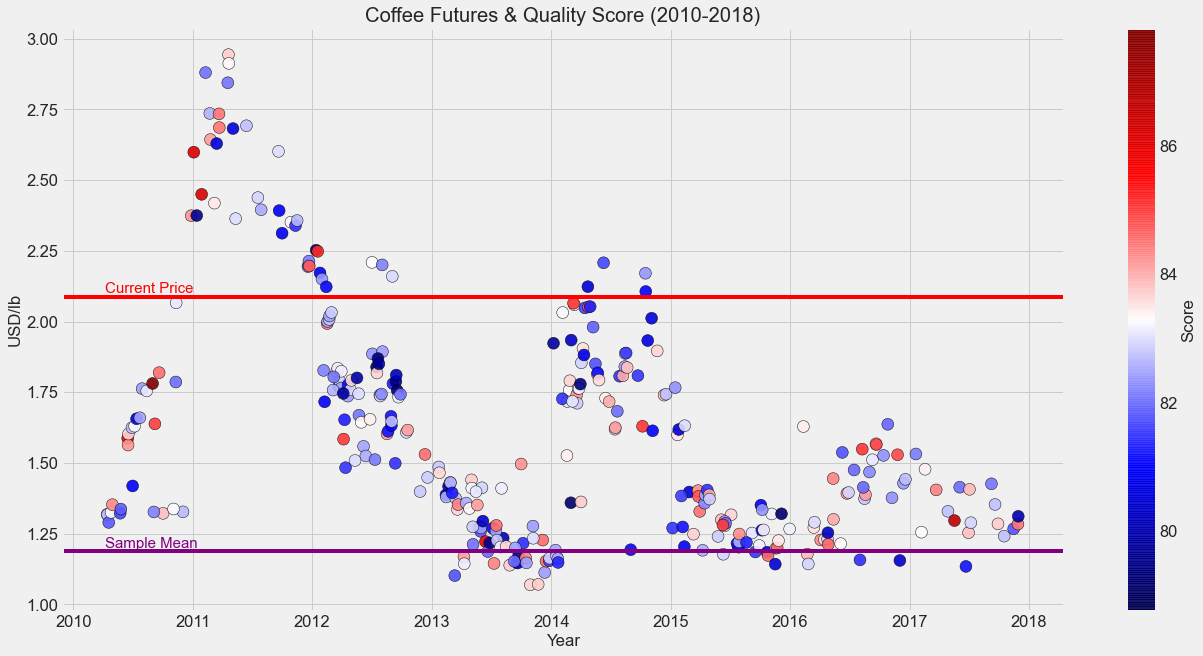

In [62]:
# Scatter plot 
data = merge_df

plt.subplots(figsize=(20,10))
plt.scatter(data.Date, data.Price, s = 140, edgecolor = 'black', 
            c = data.Score, cmap = 'seismic', alpha = 0.9)

cbar = plt.colorbar()
cbar.set_label('Score')

plt.axhline(y=df_price['Price'][-1:].values, color = 'r') 
plt.axhline(y=Sample_mean_df['Price'].mean(), color ='purple')
#plt.axhline(y=Pop_mean_df['Price'].mean(), color ='b')

plt.text(pd.to_datetime('04-06-2010'), 2.1, "Current Price", fontsize=15, color ='r') 
plt.text(pd.to_datetime('04-06-2010'), 1.2, "Sample Mean", fontsize=15, color ='purple')
#plt.text(pd.to_datetime('12-12-2010'), 1.25, "Population Mean (Box-Cox)", fontsize=15, color ='b') 

plt.title("Coffee Futures & Quality Score (2010-2018)")
plt.xlabel('Year')
plt.ylabel('USD/lb')

# <span style='color:orange'> Merge Dataset Conclusion:  </span> 
According to the Kruskal-Wallis H test, the coffee price distribution of the various grades B, C and D are similar, but with slightly different median values. The highest median goes to D followed by B, and then C. 

Next, the coffee prices of these various grades are observed to be some what following the coffee future price trend. 

# Evaluating The Feasibility To Purchase Coffee Beans

# Coffee Beans Reviewed Based On Future Prices

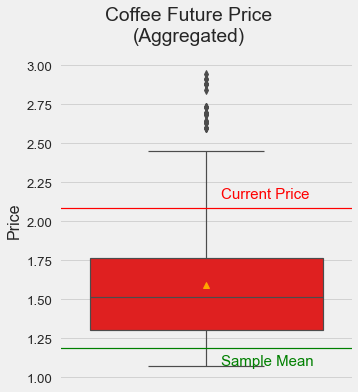

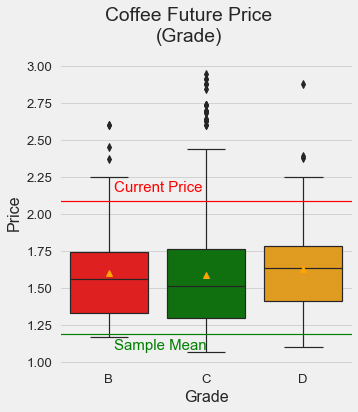

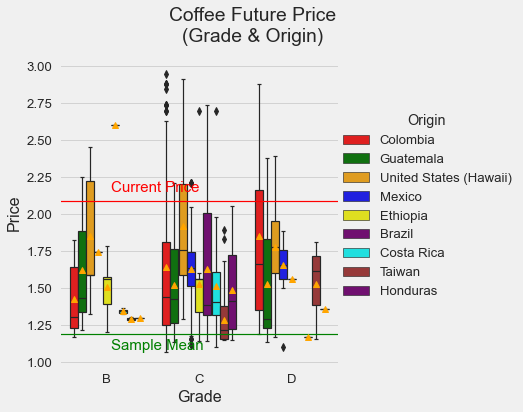

In [63]:
# boxplot of coffee price 

def coffee_price_boxplot(x_in, y_in, order_in, hue_in, title_in):
    
    merge_df_copy1 = merge_df_copy.copy(True)

    sns.set_context("paper", font_scale=1.5, rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 
    sns.set_palette(["red", "green", "orange", "blue", "yellow", "purple","cyan","brown","purple"])

    l=sns.catplot(x=x_in, y =y_in ,data=merge_df_copy1,kind="box", order = order_in, hue = hue_in, showmeans =True)
    
    plt.axhline(y=df_price['Price'][-1:].values, color = 'r')  
    plt.axhline(y=Sample_mean_df['Price'].mean(), color ='g')
    #plt.axhline(y=Pop_mean_df['Price'].mean(), color ='b')

    plt.text(0.05, 2.15, "Current Price", fontsize=15, color ='r') 
    plt.text(0.05, 1.08, "Sample Mean", fontsize=15, color ='g')
    #plt.text(0.05, 1.25, "Population Mean (Box-Cox)", fontsize=15, color ='b') 

    l.fig.suptitle(title_in, y = 1.1) 
    plt.show() 

order_mode = ['B','C','D'] # grades order to be input into box plot 

# box plot of coffee future price (aggregated form)
coffee_price_boxplot(None, 'Price', None, None, 'Coffee Future Price\n(Aggregated)')

# box plot of coffee future price segregated based on grade 
coffee_price_boxplot('Grade', 'Price', order_mode, None, 'Coffee Future Price\n(Grade)')

# box plot of coffee future price segregated based on grade and origin 
coffee_price_boxplot('Grade', 'Price', order_mode, 'Origin', 'Coffee Future Price\n(Grade & Origin)')

Based on the last seven years of the data set from the various countries, the current coffee future price lies within its third quartile. 

# Segregating Historical Data Points Based on Coffee Price

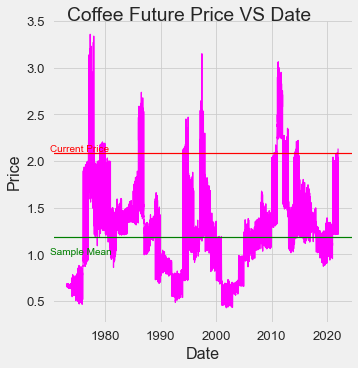

In [64]:
# coffee future price based on date with the relevant price markings (from 1973 onwards)

m = sns.relplot(x='Date',y='Price',data=df_price, kind='line',color='magenta')
m.fig.suptitle('Coffee Future Price VS Date')


plt.axhline(y=df_price['Price'][-1:].values, color = 'r') 
plt.axhline(y=Sample_mean_df['Price'].mean(), color ='g')
#plt.axhline(y=Pop_mean_df['Price'].mean(), color ='b') 

plt.text(0.05, 2.1, "Current Price", fontsize=10, color ='r') 
plt.text(0.05, 1.0, "Sample Mean", fontsize=10, color ='g')
#plt.text(0.05, 1.32, "Population Mean (Box-Cox)", fontsize=15, color ='b') 

plt.show()

In [65]:
# functions to segregate data points based on coffee prices from 1973 onwards

def per_data_above_cp(coffee_price):
    data_above_cp = df_price[df_price['Price'] > coffee_price].count()[1] # no of data point above current coffee price
    total_data = df_price.count()[1] # total no of data points in the data set
    per_data_above_cp = data_above_cp/total_data*100
    return per_data_above_cp

def per_data_below_cp(coffee_price):
    data_below_cp = df_price[df_price['Price'] < coffee_price].count()[1] 
    total_data = df_price.count()[1] # total no of data points in the data set
    per_data_below_cp = data_below_cp/total_data*100
    return per_data_below_cp  

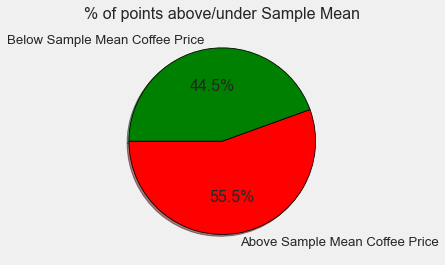

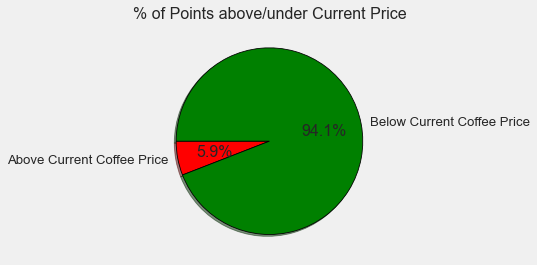

In [66]:
# create pie charts to segment based on coffee prices 

def create_pie_chart(coffee_price, above_text, below_text, title_text):
    slices = [per_data_above_cp(coffee_price),per_data_below_cp(coffee_price)]
    labels = [above_text, below_text]

    colors = ['red', 'green'] 

    plt.pie(slices, labels = labels, colors = colors, 
            shadow = True, startangle = 180,
            # show % on each slice
            autopct = '%1.1f%%',
            wedgeprops = {'edgecolor':'black'}) 

    plt.title(title_text)   
    plt.show()

pop_mean_price_box = Pop_mean_df['Price'].mean() # population mean coffee price (box-cox)
sam_mean_price_box = Sample_mean_df['Price'].mean() # sample mean coffee price (box-cox)
coffee_price = 2.1 # input current coffee price

#create_pie_chart(pop_mean_price_box, 'Above Population Mean Coffee Price', 'Below Population Mean Coffee Price', "% of points above/under Population Mean")
create_pie_chart(sam_mean_price_box, 'Above Sample Mean Coffee Price', 'Below Sample Mean Coffee Price', "% of points above/under Sample Mean")
create_pie_chart(coffee_price, 'Above Current Coffee Price', 'Below Current Coffee Price', "% of Points above/under Current Price")

Based on the last 49 years, 46.0% of the data points are below the coffee price population mean, and 44.5% of the data points are below the coffee price sample mean, while there are only 5.9% of the data points that are above the current coffee price.  

# Evaluating The Feasibility To Purchase Coffee Beans Conclusion:

The current coffee future price is extremely high, because only 5.9% of the historical data points are above the current price, and it is way above the sample mean and population mean prices. Hence, it is not a wise decision to purchase coffee beans at this point in time.

# Findings

Based on our findings, coffee grade score distribution is not similar among countries (Ethiopia is the leader in quality coffee), coffee price distribution is similar among coffee grade score (highest median goes to grade D followed by B, and then C), and the ideal coffee purchase price is below USD 1.19. 

# Conclusion

Since the current coffee future price (~USD 2.10) is way above its ideal purchase price and it is on an upwards trajectory, we have decided not to venture into the wholesale business of selling premium coffee, as ongoing coffee purchases will affect our profit margin. 

Moreover, our business risk is rather great due to the ongoing covid situation, as customers will turn to inferior goods due to their shrinking disposable income. 

# Recommendations

We might relook into entering the wholesale coffee business once the current coffee future prices are somewhat close to our ideal purchase price.

# Limitations

The accuracy of our statistical models depends whether the coffee price distribution is within USD 0.425 to USD 3.0615 and coffee grade score distribution of 78.58 to 88.08, and be deemed inaccurate if there are any deviation from these distributions. 

# Reference Sources

https://www.kaggle.com/volpatto/coffee-quality-database-from-cqi

https://www.macrotrends.net/2535/coffee-prices-historical-chart-data